In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

In [3]:
sales = pd.read_csv('C:/Users/Kartikay/Desktop/Folders/DA-Projects/Udemy Data Analytics project/Super Market Analysis/supermarket_sales - Sheet1.csv')

In [4]:
sales.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
sales.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [6]:
type(sales['Date'][0])

str

In [7]:
sales['Date'][0]

'1/5/2019'

In [8]:
from pandas import to_datetime

In [9]:
sales['Date'] = to_datetime(sales['Date'])

In [10]:
type(sales['Date'])

pandas.core.series.Series

In [11]:
sales['Time'] = to_datetime(sales['Time'])

In [12]:
type(sales['Time'])

pandas.core.series.Series

In [13]:
sales['Time'].dtype

dtype('<M8[ns]')

In [14]:
sales['Date'].dtype

dtype('<M8[ns]')

In [15]:
sales['Date']

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

In [16]:
def fetch_att(x):
    day = x.day
    month = x.month
    year = x.year
    return pd.Series([day,month,year])

In [17]:
sales[['day','month','year']] = sales['Date'].apply(fetch_att)

In [18]:
sales.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,day,month,year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-08-09 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2022-08-09 10:29:00,Cash,76.40,4.761905,3.8200,9.6,8,3,2019


In [19]:
sales['Date'].apply(lambda x:x.day)

0       5
1       8
2       3
3      27
4       8
       ..
995    29
996     2
997     9
998    22
999    18
Name: Date, Length: 1000, dtype: int64

In [20]:
sales.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,2.649463e+01,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431e+00,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,2.458853e+02,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,2.341765e+02,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,6.131498e-14,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580e+00,4.000000,5.500000,7.000000,8.500000,10.000000
day,1000.0,15.256000,8.693563e+00,1.000000,8.000000,15.000000,23.000000,31.000000
month,1000.0,1.993000,8.352536e-01,1.000000,1.000000,2.000000,3.000000,3.000000


<AxesSubplot:>

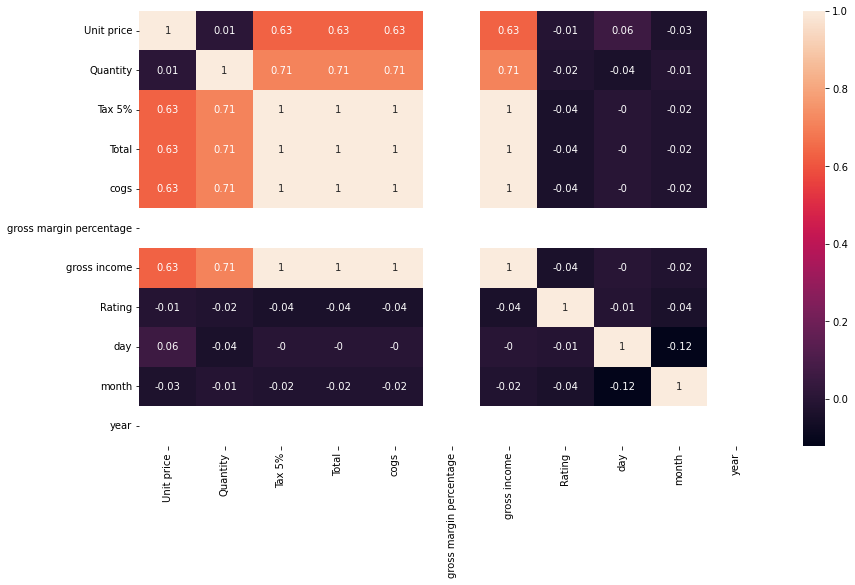

In [21]:
plt.figure(figsize=(14,8))
sns.heatmap(np.round(sales.corr(),2),annot=True)

<AxesSubplot:xlabel='Tax 5%', ylabel='gross income'>

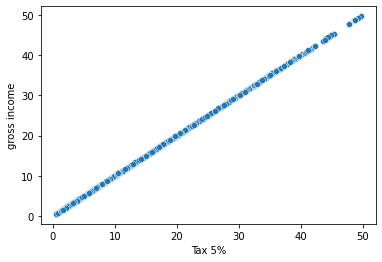

In [22]:
sns.scatterplot(x='Tax 5%',y = 'gross income',data=sales)

<AxesSubplot:xlabel='Quantity', ylabel='cogs'>

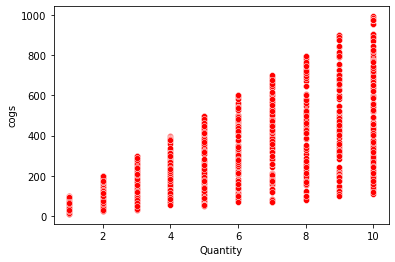

In [23]:
sns.scatterplot(x='Quantity',y = 'cogs',data=sales,color='red')

In [24]:
sales['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

 Which city has the most gross income

In [25]:
sales.groupby(['City'])['gross income'].median()

City
Mandalay     12.04200
Naypyitaw    12.92475
Yangon       11.46800
Name: gross income, dtype: float64

Finding the mean rating

In [26]:
sales['Rating'].mean()

6.972700000000003

C:\Users\Kartikay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


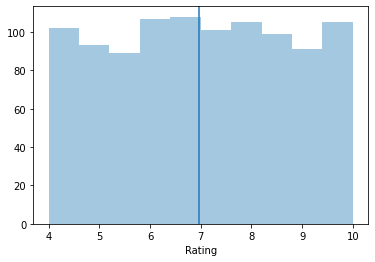

In [27]:
sns.distplot(sales['Rating'],kde=False)
plt.axvline(x = sales['Rating'].mean())

Defining custom Functions

In [28]:
def return_countplot(column,hue_name=None):
    sns.countplot(x=column,data=sales,hue=hue_name)
    

In [29]:
def return_boxplot(x_column,y_column):
    return sns.boxplot(x = x_column, y=y_column, data = sales)

In [30]:
def return_lineplot(x_column,y_column):
    return sns.lineplot(x = x_column, y=y_column, data=sales)

In [31]:
def return_rel_plot(x_col,y_col,col_name=None, row_name=None ,rel_type=None, hue_name=None, style_name=None):
    return sns.relplot(x=x_col, y=y_col, col=col_name, row=row_name, kind=rel_type, hue=hue_name, style=style_name, data=sales)

Analyzing dituribution of various branches (5 point summary)

<AxesSubplot:xlabel='Branch', ylabel='Rating'>

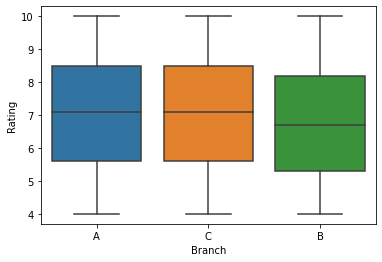

In [32]:
return_boxplot('Branch','Rating')

Analyzing trend of sales

In [ ]:
sales.dtypes

In [ ]:
return_lineplot('day','Quantity')

How much sales occur in each and every branch

In [ ]:
return_rel_plot(x_col='day',y_col='Quantity',col_name='month',row_name='Branch',rel_type='line',hue_name='Gender',style_name='Gender')

Number of Products sold per day

In [ ]:
return_rel_plot(x_col='day',y_col='Total',col_name='month',row_name='Branch',rel_type='line')

Number of products sold in a month per day

In [ ]:
return_rel_plot(x_col='day',y_col='Total',col_name='Product line',row_name='Branch',rel_type='line')

In [ ]:
return_boxplot('Quantity','Product line')

Which products sells the most

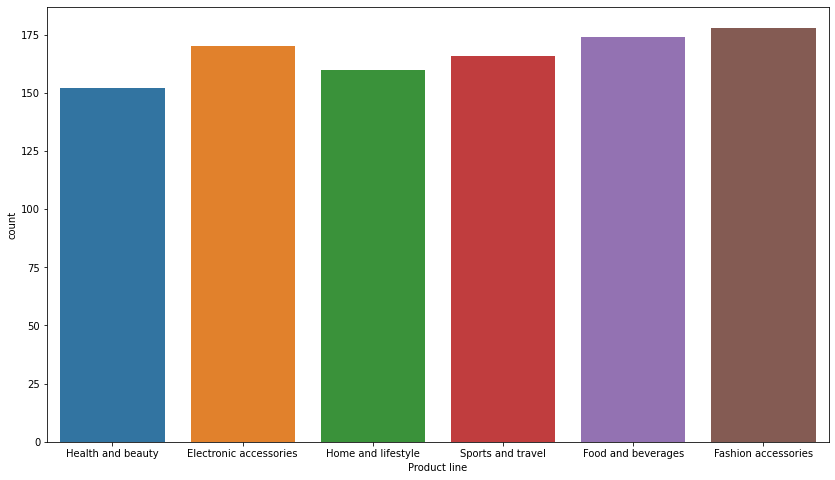

In [35]:
plt.figure(figsize=(14,8))
return_countplot('Product line')

Relationship between gross income and product line

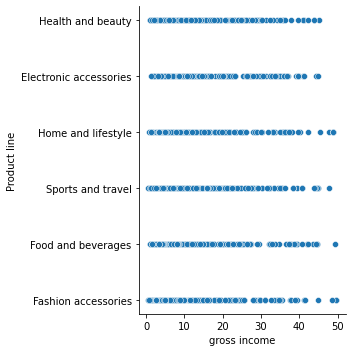

In [36]:
return_rel_plot('gross income','Product line', rel_type='scatter')

Most frequent method used by customers to make the payment at different stores

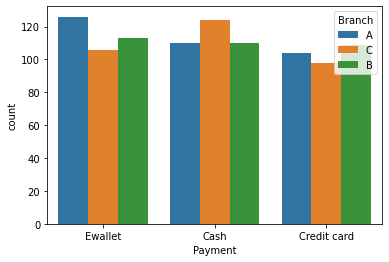

In [37]:
return_countplot('Payment', hue_name='Branch')

Does Customer type influence the sales?

In [39]:
sales.groupby('Customer type')['Total'].sum()

Customer type
Member    164223.444
Normal    158743.305
Name: Total, dtype: float64

In [41]:
sales.groupby('Customer type').agg({'Total':'sum'})

,Total
Customer type,
Member,164223.444
Normal,158743.305


Does customer type influence customer ratings

<AxesSubplot:xlabel='Customer type', ylabel='Rating'>

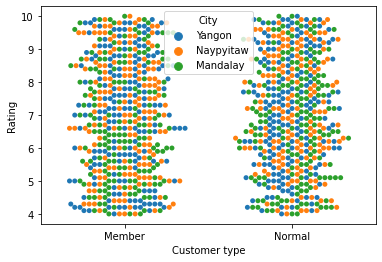

In [42]:
sns.swarmplot(x='Customer type', y='Rating', data=sales, hue='City')

In [43]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pillow in c:\users\kartikay\anaconda3\lib\site-packages (from wordcloud) (8.4.0)



In [45]:
from wordcloud import WordCloud

In [46]:
''.join(sales['Product line'])

'Health and beautyElectronic accessoriesHome and lifestyleHealth and beautySports and travelElectronic accessoriesElectronic accessoriesHome and lifestyleHealth and beautyFood and beveragesFashion accessoriesElectronic accessoriesElectronic accessoriesFood and beveragesHealth and beautySports and travelHealth and beautySports and travelFood and beveragesHome and lifestyleElectronic accessoriesHealth and beautyHome and lifestyleElectronic accessoriesSports and travelHome and lifestyleFashion accessoriesFashion accessoriesFood and beveragesHealth and beautyFashion accessoriesSports and travelSports and travelHealth and beautyFood and beveragesSports and travelSports and travelElectronic accessoriesHealth and beautyHome and lifestyleHome and lifestyleHome and lifestyleSports and travelFood and beveragesHealth and beautyElectronic accessoriesHealth and beautyFood and beveragesElectronic accessoriesFashion accessoriesFood and beveragesFood and beveragesFashion accessoriesFashion accessories

(-0.5, 399.5, 199.5, -0.5)

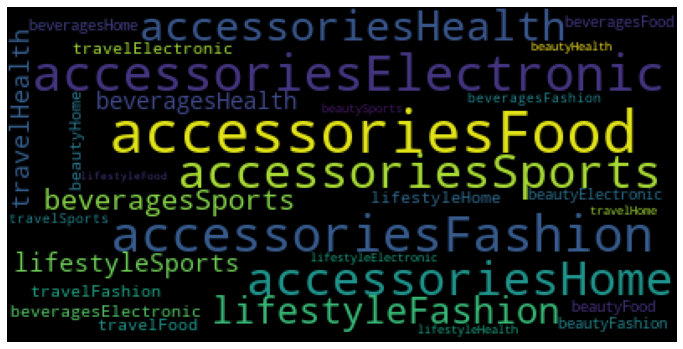

In [50]:
plt.figure(figsize=(12,10))
wordcloud = WordCloud().generate(''.join(sales['Product line']))
plt.imshow(wordcloud)
plt.axis('off')